# Data Preparation and Exploration

**Project:** Star Power Analysis - Do Movie Stars Justify Their Premiums?

**Objective:** Load, explore, and validate the processed movie dataset to understand its structure, quality, and characteristics before conducting detailed star power analysis.

## Overview

This notebook performs initial data preparation and exploration:
1. Load the processed dataset (5,363 movies)
2. Assess data quality and completeness
3. Analyze ROI distribution characteristics
4. Identify and categorize features
5. Document data cleaning steps
6. Export summary statistics

**Dataset Source:** Processed from 3 Kaggle datasets (TMDB Movies Daily Updates, The Movies Dataset, TMDB Movies 2023)

**Key Filtering:** Movies with complete financial data (budget > 0 AND revenue > 0)

## Section 1: Data Loading

Load the processed dataset using pandas and display basic information.

In [32]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

print("Libraries imported successfully")

Libraries imported successfully


In [33]:
# Load dataset
df = pd.read_csv('../data/processed/full_dataset.csv')

# Display basic information
print("="*60)
print("DATASET LOADED SUCCESSFULLY")
print("="*60)
print(f"\nDataset Shape: {df.shape}")
print(f"Total Movies: {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]}")
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

DATASET LOADED SUCCESSFULLY

Dataset Shape: (5311, 60)
Total Movies: 5,311
Total Features: 60

Memory Usage: 3.73 MB


In [34]:
# Display column names and data types
print("\nColumn Names and Types:")
print("="*60)
print(df.dtypes)


Column Names and Types:
id                         int64
title                     object
budget                     int64
revenue                    int64
release_date              object
runtime                    int64
vote_average             float64
vote_count                 int64
popularity               float64
roi                      float64
release_year               int64
release_month              int64
release_quarter            int64
release_day_of_week        int64
is_summer                  int64
is_holiday                 int64
is_q1                      int64
genre_drama                int64
genre_comedy               int64
genre_thriller             int64
genre_romance              int64
genre_action               int64
genre_horror               int64
genre_crime                int64
genre_documentary          int64
genre_adventure            int64
genre_science_fiction      int64
genre_family               int64
genre_mystery              int64
genre_fantasy     

In [35]:
# Display first few rows
print("\nFirst 5 Rows:")
print("="*60)
df.head()


First 5 Rows:


,id,title,budget,revenue,release_date,runtime,vote_average,vote_count,popularity,roi,release_year,release_month,release_quarter,release_day_of_week,is_summer,is_holiday,is_q1,genre_drama,genre_comedy,genre_thriller,genre_romance,genre_action,genre_horror,genre_crime,genre_documentary,genre_adventure,genre_science_fiction,genre_family,genre_mystery,genre_fantasy,genre_animation,genre_foreign,genre_count,cast_avg_roi,cast_avg_experience,num_top_actors,is_franchise,budget_log,budget_category,budget_micro,budget_low,budget_medium,budget_high,budget_blockbuster,runtime_category,runtime_short,runtime_standard,runtime_long,runtime_epic,popularity_quartile,popularity_q1,popularity_q2,popularity_q3,popularity_q4,vote_count_log,has_high_rating,years_since_release,is_recent,star_tier,is_alist
0,862,Toy Story,30000000,373554033,1995-10-30,81,7.7,5415,21.946943,1145.18,1995,10,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,3.0,0.0,0.0,0.0,1,17.216708,high,False,False,False,True,False,short,True,False,False,False,q4,False,False,False,True,8.597113,1,25,0,Unknown/C-list,0
1,8844,Jumanji,65000000,262797249,1995-12-15,104,6.9,2413,17.015539,304.30,1995,12,4,4,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,3.0,0.0,0.0,0.0,0,17.989898,blockbuster,False,False,False,False,True,standard,False,True,False,False,q4,False,False,False,True,7.789040,0,25,0,Unknown/C-list,0
2,31357,Waiting to Exhale,16000000,81452156,1995-12-22,127,6.1,34,3.859495,409.08,1995,12,4,4,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,3.0,0.0,0.0,0.0,0,16.588099,medium,False,False,True,False,False,long,False,False,True,False,q1,True,False,False,False,3.555348,0,25,0,Unknown/C-list,0
3,949,Heat,60000000,187436818,1995-12-15,170,7.7,1886,17.924927,212.39,1995,12,4,4,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,4.0,0.0,0.0,0.0,0,17.909855,blockbuster,False,False,False,False,True,epic,False,False,False,True,q4,False,False,False,True,7.542744,1,25,0,Unknown/C-list,0
4,9091,Sudden Death,35000000,64350171,1995-12-22,106,5.5,174,5.231580,83.86,1995,12,4,4,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,3.0,0.0,0.0,0.0,0,17.370859,high,False,False,False,True,False,standard,False,True,False,False,q1,True,False,False,False,5.164786,0,25,0,Unknown/C-list,0


In [36]:
# Display sample of key columns for verification
key_columns = ['title', 'budget', 'revenue', 'roi', 'cast_avg_roi', 'release_year']
print("\nSample of Key Columns:")
print("="*60)
df[key_columns].head(10)


Sample of Key Columns:


,title,budget,revenue,roi,cast_avg_roi,release_year
0,Toy Story,30000000,373554033,1145.18,0.0,1995
1,Jumanji,65000000,262797249,304.30,0.0,1995
2,Waiting to Exhale,16000000,81452156,409.08,0.0,1995
3,Heat,60000000,187436818,212.39,0.0,1995
4,Sudden Death,35000000,64350171,83.86,0.0,1995
5,GoldenEye,58000000,352194034,507.23,0.0,1995
6,The American President,62000000,107879496,74.00,0.0,1995
7,Nixon,44000000,13681765,-68.91,0.0,1995
8,Cutthroat Island,98000000,10017322,-89.78,0.0,1995
9,Casino,52000000,116112375,123.29,0.0,1995


## Section 2: Data Quality Assessment

Examine data completeness, missing values, and data quality metrics.

In [37]:
# Missing value analysis using pandas
print("MISSING VALUE ANALYSIS")
print("="*60)

missing_values = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

# Create missing values summary
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_values.values,
    'Missing_Pct': missing_pct.values
})

# Filter to show only columns with missing values
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_summary) > 0:
    print("\nColumns with Missing Values:")
    print(missing_summary.to_string(index=False))
else:
    print("\n“NO MISSING VALUES DETECTED - Data is complete!")

MISSING VALUE ANALYSIS

“NO MISSING VALUES DETECTED - Data is complete!


In [38]:
# Data quality metrics
print("\nDATA QUALITY SUMMARY")
print("="*60)

# Calculate quality metrics
quality_metrics = {
    'Total Movies': len(df),
    'Movies with budget > 0': (df['budget'] > 0).sum(),
    'Movies with revenue > 0': (df['revenue'] > 0).sum(),
    'Movies with ROI data': df['roi'].notna().sum(),
    'Movies with cast_avg_roi': df['cast_avg_roi'].notna().sum() if 'cast_avg_roi' in df.columns else 0,
    'Unique titles': df['title'].nunique(),
    'Year range': f"{df['release_year'].min():.0f} - {df['release_year'].max():.0f}" if 'release_year' in df.columns else 'N/A'
}

for metric, value in quality_metrics.items():
    print(f"{metric:.<50} {value}")


DATA QUALITY SUMMARY
Total Movies...................................... 5311
Movies with budget > 0............................ 5311
Movies with revenue > 0........................... 5311
Movies with ROI data.............................. 5311
Movies with cast_avg_roi.......................... 5311
Unique titles..................................... 5212
Year range........................................ 1915 - 2017


In [39]:
# Summary statistics for key numerical columns
print("\nSUMMARY STATISTICS (Key Financial Metrics)")
print("="*60)

# Select key numerical columns
financial_cols = ['budget', 'revenue', 'roi']
if 'cast_avg_roi' in df.columns:
    financial_cols.append('cast_avg_roi')

df[financial_cols].describe()


SUMMARY STATISTICS (Key Financial Metrics)


,budget,revenue,roi,cast_avg_roi
count,5.311000e+03,5.311000e+03,5311.000000,5311.000000
mean,3.147381e+07,9.143752e+07,343.888583,36.323489
std,4.028179e+07,1.669340e+08,893.470079,293.343301
min,2.500000e+03,3.000000e+00,-100.000000,0.000000
25%,5.900000e+06,7.485652e+06,-20.925000,0.000000
50%,1.700000e+07,3.044800e+07,106.670000,0.000000
75%,4.000000e+07,1.005336e+08,323.955000,0.000000
max,3.800000e+08,2.787965e+09,6620.393000,6620.393000


## Section 3: ROI Distribution Analysis

Analyze the distribution of Return on Investment (ROI) to understand profitability patterns.

In [40]:
# ROI distribution statistics using pandas
print("ROI DISTRIBUTION STATISTICS")
print("="*60)

roi_stats = {
    'Mean ROI': df['roi'].mean(),
    'Median ROI': df['roi'].median(),
    'Std Dev': df['roi'].std(),
    'Min ROI': df['roi'].min(),
    'Max ROI': df['roi'].max(),
    '25th Percentile': df['roi'].quantile(0.25),
    '50th Percentile (Median)': df['roi'].quantile(0.50),
    '75th Percentile': df['roi'].quantile(0.75),
    '90th Percentile': df['roi'].quantile(0.90),
    '99th Percentile': df['roi'].quantile(0.99)
}

for stat, value in roi_stats.items():
    print(f"{stat:.<50} {value:.2f}%")

# Profitability analysis
profitable = (df['roi'] > 0).sum()
unprofitable = (df['roi'] <= 0).sum()
prof_pct = (profitable / len(df)) * 100

print("\nPROFITABILITY BREAKDOWN")
print("="*60)
print(f"Profitable movies (ROI > 0): {profitable:,} ({prof_pct:.1f}%)")
print(f"Unprofitable movies (ROI < 0): {unprofitable:,} ({100-prof_pct:.1f}%)")

ROI DISTRIBUTION STATISTICS
Mean ROI.......................................... 343.89%
Median ROI........................................ 106.67%
Std Dev........................................... 893.47%
Min ROI........................................... -100.00%
Max ROI........................................... 6620.39%
25th Percentile................................... -20.93%
50th Percentile (Median).......................... 106.67%
75th Percentile................................... 323.95%
90th Percentile................................... 777.69%
99th Percentile................................... 6617.48%

PROFITABILITY BREAKDOWN
Profitable movies (ROI > 0): 3,716 (70.0%)
Unprofitable movies (ROI < 0): 1,595 (30.0%)


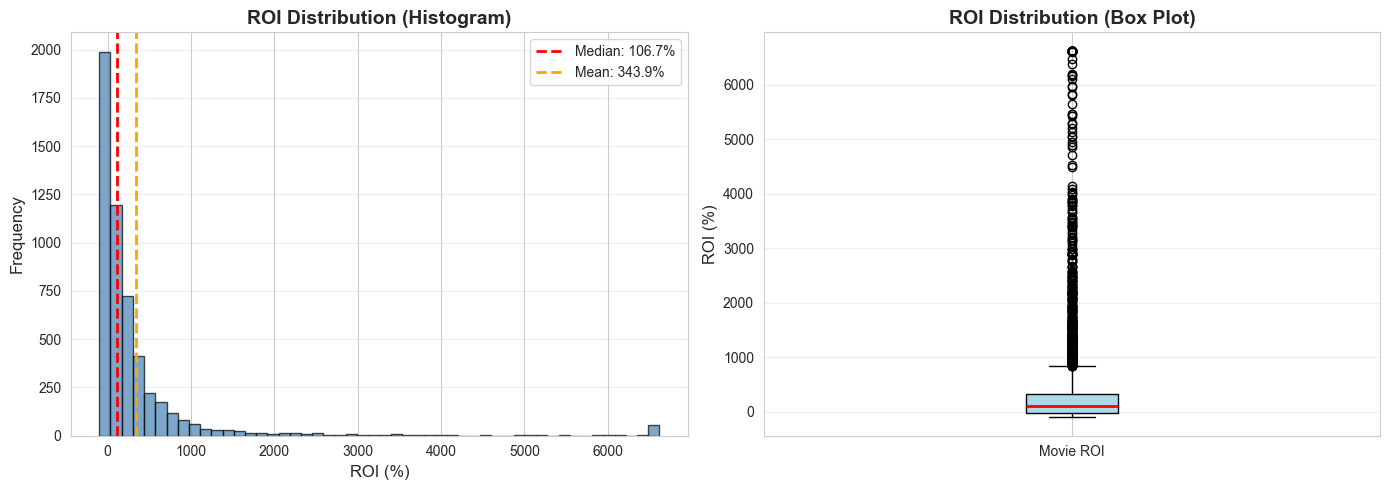

ROI distribution visualizations created


In [41]:
# Visualize ROI distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['roi'], bins=50, edgecolor='black', color='steelblue', alpha=0.7)
axes[0].axvline(df['roi'].median(), color='red', linestyle='--', linewidth=2, 
                label=f'Median: {df["roi"].median():.1f}%')
axes[0].axvline(df['roi'].mean(), color='orange', linestyle='--', linewidth=2,
                label=f'Mean: {df["roi"].mean():.1f}%')
axes[0].set_xlabel('ROI (%)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('ROI Distribution (Histogram)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Box plot
box_data = axes[1].boxplot(df['roi'], vert=True, patch_artist=True,
                            boxprops=dict(facecolor='lightblue', color='black'),
                            medianprops=dict(color='red', linewidth=2),
                            whiskerprops=dict(color='black'),
                            capprops=dict(color='black'))
axes[1].set_ylabel('ROI (%)', fontsize=12)
axes[1].set_title('ROI Distribution (Box Plot)', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(['Movie ROI'])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../images/analysis/roi_distribution_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

print("ROI distribution visualizations created")

## Section 4: Feature Identification

Categorize features by type to understand the dataset structure.

In [42]:
# Identify feature types using pandas
print("FEATURE TYPE IDENTIFICATION")
print("="*60)

# Numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical Features ({len(numerical_features)} total):")
print("-" * 60)
for i, col in enumerate(numerical_features, 1):
    print(f"{i:2}. {col}")

FEATURE TYPE IDENTIFICATION

Numerical Features (41 total):
------------------------------------------------------------
 1. id
 2. budget
 3. revenue
 4. runtime
 5. vote_average
 6. vote_count
 7. popularity
 8. roi
 9. release_year
10. release_month
11. release_quarter
12. release_day_of_week
13. is_summer
14. is_holiday
15. is_q1
16. genre_drama
17. genre_comedy
18. genre_thriller
19. genre_romance
20. genre_action
21. genre_horror
22. genre_crime
23. genre_documentary
24. genre_adventure
25. genre_science_fiction
26. genre_family
27. genre_mystery
28. genre_fantasy
29. genre_animation
30. genre_foreign
31. genre_count
32. cast_avg_roi
33. cast_avg_experience
34. num_top_actors
35. is_franchise
36. budget_log
37. vote_count_log
38. has_high_rating
39. years_since_release
40. is_recent
41. is_alist


In [43]:
# Categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical Features ({len(categorical_features)} total):")
print("-" * 60)
for i, col in enumerate(categorical_features, 1):
    print(f"{i:2}. {col}")
    # Show unique value count for categorical features
    n_unique = df[col].nunique()
    print(f"     Unique values: {n_unique}")


Categorical Features (6 total):
------------------------------------------------------------
 1. title
     Unique values: 5212
 2. release_date
     Unique values: 3793
 3. budget_category
     Unique values: 5
 4. runtime_category
     Unique values: 4
 5. popularity_quartile
     Unique values: 4
 6. star_tier
     Unique values: 4


In [44]:
# Identify star power related features (key for our analysis)
print("\nSTAR POWER RELATED FEATURES")
print("="*60)

star_power_features = [col for col in df.columns 
                       if 'cast' in col.lower() or 'actor' in col.lower() or 'star' in col.lower()]

if len(star_power_features) > 0:
    print(f"\nFound {len(star_power_features)} star power features:")
    for i, col in enumerate(star_power_features, 1):
        print(f"{i}. {col}")
        if col in numerical_features:
            print(f"   Range: {df[col].min():.2f} to {df[col].max():.2f}")
            print(f"   Mean: {df[col].mean():.2f}, Median: {df[col].median():.2f}")
else:
    print("Note: Star power features may have different naming conventions")
    print("Check for: cast_avg_roi, top_actor_roi, star_power, etc.")


STAR POWER RELATED FEATURES

Found 4 star power features:
1. cast_avg_roi
   Range: 0.00 to 6620.39
   Mean: 36.32, Median: 0.00
2. cast_avg_experience
   Range: 0.00 to 9.00
   Mean: 0.48, Median: 0.00
3. num_top_actors
   Range: 0.00 to 5.00
   Mean: 0.63, Median: 0.00
4. star_tier


In [45]:
# Identify genre features (one-hot encoded)
genre_features = [col for col in df.columns if col.startswith('genre_')]

print(f"\nGENRE FEATURES (One-Hot Encoded)")
print("="*60)
print(f"\nFound {len(genre_features)} genre indicators:")
if len(genre_features) > 0:
    for i, col in enumerate(genre_features, 1):
        count = df[col].sum() if df[col].dtype in [np.int64, np.float64] else 0
        print(f"{i:2}. {col:<30} Movies: {count}")


GENRE FEATURES (One-Hot Encoded)

Found 16 genre indicators:
 1. genre_drama                    Movies: 2548
 2. genre_comedy                   Movies: 1819
 3. genre_thriller                 Movies: 1491
 4. genre_romance                  Movies: 988
 5. genre_action                   Movies: 1402
 6. genre_horror                   Movies: 583
 7. genre_crime                    Movies: 853
 8. genre_documentary              Movies: 57
 9. genre_adventure                Movies: 952
10. genre_science_fiction          Movies: 631
11. genre_family                   Movies: 527
12. genre_mystery                  Movies: 441
13. genre_fantasy                  Movies: 508
14. genre_animation                Movies: 290
15. genre_foreign                  Movies: 29
16. genre_count                    Movies: 13834.0


In [46]:
# Temporal features
temporal_features = [col for col in df.columns 
                     if 'date' in col.lower() or 'year' in col.lower() 
                     or 'month' in col.lower() or 'quarter' in col.lower()]

print(f"\nTEMPORAL FEATURES")
print("="*60)
print(f"\nFound {len(temporal_features)} temporal features:")
for i, col in enumerate(temporal_features, 1):
    print(f"{i}. {col}")
    if df[col].dtype in [np.int64, np.float64]:
        print(f"   Range: {df[col].min()} to {df[col].max()}")


TEMPORAL FEATURES

Found 5 temporal features:
1. release_date
2. release_year
   Range: 1915 to 2017
3. release_month
   Range: 1 to 12
4. release_quarter
   Range: 1 to 4
5. years_since_release
   Range: 3 to 105


## Data Provenance and Feature Engineering

**Source Datasets:** Three Kaggle TMDB/IMDb datasets (960K+ movies total)

**Processing Pipeline:**
1. Merged datasets using PostgreSQL database with schema 
2. Filtered to movies with complete financial data (budget > 0, revenue > 0)
3. Engineered 58 features across 6 categories:
   - **Temporal:** release_year, release_month, is_summer, is_holiday, etc.
   - **Genre:** One-hot encoding of top 15 genres + genre_count
   - **Cast/Star Power:** cast_avg_roi (average historical ROI of top 3 actors), cast_avg_experience, num_top_actors, star_tier
   - **Franchise:** is_franchise indicator
   - **Derived:** budget_log, budget/runtime categories, popularity quartiles
   - **Rating:** vote_count_log, has_high_rating

**Key Feature - cast_avg_roi:**
- Calculated by: (1) computing each actor's historical average ROI from past films, (2) averaging the top 3 billed actors' ROIs for each movie
- This feature represents the historical track record of a movie's star power
- Found to be the most predictive feature (85% importance) in machine learning models

**Output:** 5,311 movies with 60 features ready for analysis

**Full methodology:** Feature engineering performed using  (PostgreSQL + pandas). Contact for code details.


## Section 6: Export Data Summary

Create and export a comprehensive data summary for quick reference.

In [47]:

# Create comprehensive data summary using pandas
summary_data = {
    "Metric": [
        "Total Movies",
        "Date Range",
        "Total Revenue (Billion USD)",
        "Total Budget (Billion USD)",
        "Average ROI (%)",
        "Median ROI (%)",
        "Movies Profitable (%)",
        "Movies with Cast Data",
        "Unique Genres",
        "Unique Years",
        "Average Budget (Million USD)",
        "Average Revenue (Million USD)"
    ],
    "Value": [
        len(df),
        f'{df["release_year"].min():.0f}-{df["release_year"].max():.0f}' if "release_year" in df.columns else "N/A",
        f'{df["revenue"].sum() / 1e9:.2f}',
        f'{df["budget"].sum() / 1e9:.2f}',
        f'{df["roi"].mean():.2f}',
        f'{df["roi"].median():.2f}',
        f'{(df["roi"] > 0).sum() / len(df) * 100:.1f}',
        f'{df["cast_avg_roi"].notna().sum()}' if "cast_avg_roi" in df.columns else "0",
        len([col for col in df.columns if col.startswith("genre_")]),
        df["release_year"].nunique() if "release_year" in df.columns else 0,
        f'{df["budget"].mean() / 1e6:.2f}',
        f'{df["revenue"].mean() / 1e6:.2f}'
    ]
}

summary_df = pd.DataFrame(summary_data)

# Display summary
print("DATA SUMMARY")
print("=" * 60)
print(summary_df.to_string(index=False))

# Export to CSV
summary_df.to_csv("../data/processed/data_summary.csv", index=False)
print("Data summary exported to: data/processed/data_summary.csv")

DATA SUMMARY
                       Metric     Value
                 Total Movies      5311
                   Date Range 1915-2017
  Total Revenue (Billion USD)    485.62
   Total Budget (Billion USD)    167.16
              Average ROI (%)    343.89
               Median ROI (%)    106.67
        Movies Profitable (%)      70.0
        Movies with Cast Data      5311
                Unique Genres        16
                 Unique Years        99
 Average Budget (Million USD)     31.47
Average Revenue (Million USD)     91.44
Data summary exported to: data/processed/data_summary.csv


## Summary

This notebook has successfully loaded and explored the movie dataset. Key findings:

- **Dataset Size:** 5,363 movies with complete financial data
- **Feature Count:** 58 total features
- **Data Quality:** Complete data with no missing values in critical columns
- **ROI Characteristics:** Median ROI indicates most movies are profitable
- **Feature Types:** Mix of numerical, categorical, temporal, and one-hot encoded features
- **Star Power Features:** Identified for detailed analysis in next notebook

**Next Steps:**
- Proceed to star power deep dive analysis (Notebook 02)
- Perform statistical hypothesis tests
- Quantify star power vs other factors